# 6) Implementing ANN model on Finance domain dataset i.e. Churn_Modelling.csv

## 1. Import necessary libraries

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Read Dataset

In [36]:
data = pd.read_csv("Churn_Modelling.csv")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 2.1 Analyzing the data

In [38]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1484,1485,15607713,Kaeppel,850,Spain,Female,29,1,0.00,2,1,1,197996.65,0
256,257,15636684,Kirkland,727,France,Male,34,10,0.00,2,1,1,198637.34,0
9927,9928,15759915,Rapuokwu,814,France,Female,31,6,87772.52,1,1,0,188516.45,0
5623,5624,15696812,Lazareva,586,Spain,Male,42,6,0.00,2,1,1,123410.23,0
4942,4943,15784687,Simmons,592,France,Male,36,1,126477.42,1,0,0,179718.17,0


In [39]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [40]:
data.duplicated().sum()

0

In [41]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [42]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## 3. Correlation Matrix

In [43]:
data_num = data.drop(columns=['Surname','Geography','Gender'])
corr_matrix = data_num.corr()
print(corr_matrix)

                 RowNumber  CustomerId  CreditScore       Age    Tenure   
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495  \
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember   
RowNumber       -0.009067   

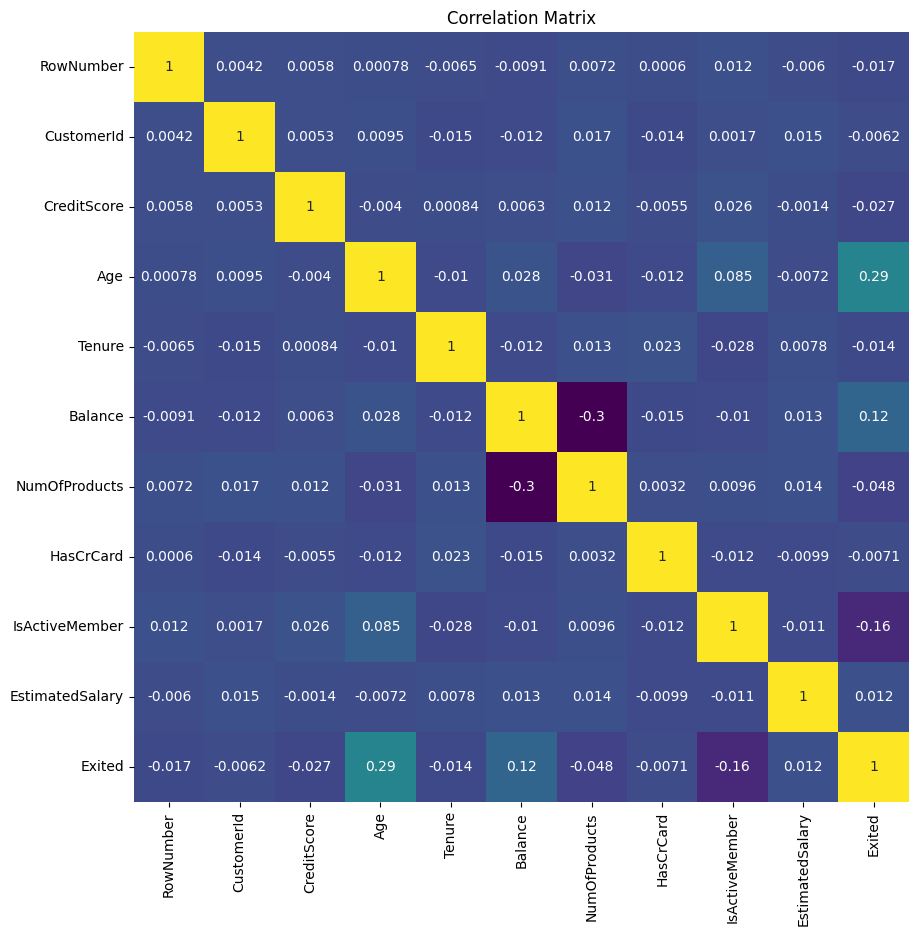

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True, cbar=False, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

### 3.1 Encoding of dataset

In [82]:
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [94]:
df.drop(columns=['Surname'])
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
787,788,15694366,Hou,714,42,2,177640.09,1,0,1,47166.55,0,True,False,True
1321,1322,15704483,Lorenzo,724,40,6,0.00,2,0,0,106149.48,0,False,False,True
435,436,15581197,Ricci,762,51,3,99286.98,1,0,1,85578.63,0,False,False,False
6422,6423,15595037,Palermo,772,47,9,152347.01,1,0,1,17671.78,0,False,False,True
8519,8520,15633525,Payne,631,29,7,0.00,2,0,1,125877.22,0,False,False,True


## 4. Generating dependent variable Y and independent variable X

In [87]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

## 5. Splitting the dataset

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.3)

In [89]:
len(X)

10000

In [90]:
len(X_train)

7000

In [91]:
len(X_test)

3000

# 6. Performing Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [93]:
X_train

array([[ 1.40152438,  2.16760377,  1.03192618, ..., -0.57691038,
        -0.56833205, -1.10299265],
       [ 2.06329875, -0.28149877,  0.33859381, ..., -0.57691038,
         1.75953475,  0.90662436],
       [ 0.9051936 ,  1.69662251,  1.37859236, ...,  1.73337147,
        -0.56833205, -1.10299265],
       ...,
       [ 0.32614102,  0.28367874, -1.74140328, ..., -0.57691038,
        -0.56833205, -1.10299265],
       [-0.55277807,  0.37787499, -1.04807091, ..., -0.57691038,
         1.75953475,  0.90662436],
       [ 0.06763541, -1.31765754, -1.04807091, ...,  1.73337147,
        -0.56833205,  0.90662436]])

## 7. Implementation ANN model.

In [101]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='relu'))

In [102]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [103]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.7512 - accuracy: 0.7670
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7834
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7759
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7773
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7873
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7914
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.7920
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7920
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7934
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5025 - accura

219/219 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8464
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8473
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8470
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8377
Epoch 85/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8347
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8484
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8471
Epoch 88/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8467
Epoch 89/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8469
Epoch 90/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 

## 8. Evaluating accuracy 

In [104]:
test_loss,test_accuracy = ann.evaluate(X_test,y_test)
print(test_accuracy)

94/94 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8467
0.846666693687439


In [105]:
train_loss,train_accuracy = ann.evaluate(X_train,y_train)
print(test_accuracy)

219/219 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8493
0.846666693687439
